# HR Analytics Project- Understanding the Attrition in HR

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
d =  pd.read_csv('C:/Users/Aayushi Lashkari/Downloads/ibm-hr-analytics-employee-attrition-performance.zip')

In [8]:
df = pd.DataFrame(d)

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Each feature is in correct datatype :
    
    26 columns in integer type and 9 is in object type
    
    No null values in any column

In [14]:
df.shape

(1470, 35)

1470 rows and 35 columns in the dataset

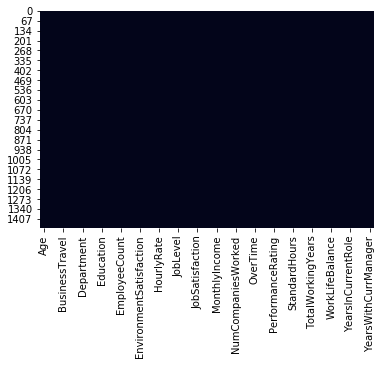

In [16]:
sns.heatmap(df.isnull(),cbar=False)

No null values in the dataset

In [17]:
numerical_features = [i for i in df if df[i].dtypes != 'O']

In [19]:
numerical_features  # seperates numerical columns from the dataset

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [20]:
feature_yr = [f for f in numerical_features if 'Yr' in f or 'Year' in f]

In [21]:
feature_yr

['TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Above are the temporal features in the dataset 

In [22]:
categorical_features = [i for i in df if df[i].dtypes=='O']

In [23]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

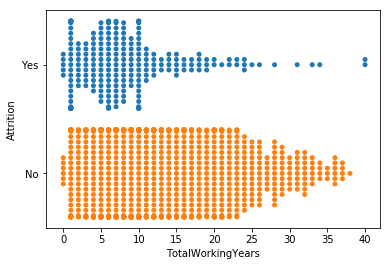

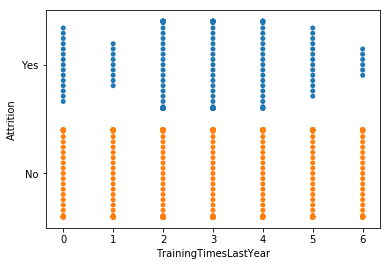

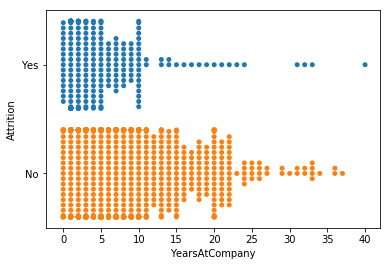

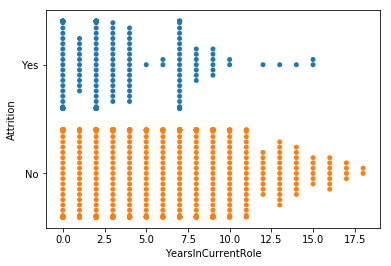

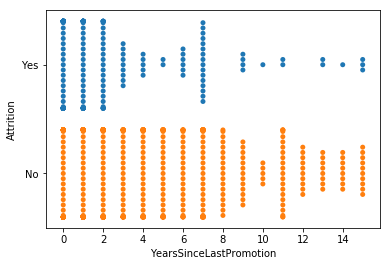

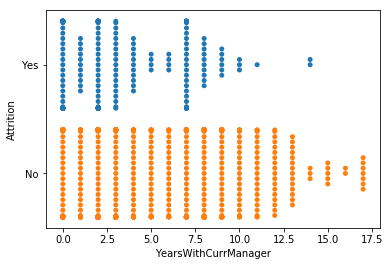

In [31]:
for i in feature_yr:
    sns.swarmplot(x=i,y='Attrition',data=df)
    plt.show()

Majority of the employees are given attrition with less workingyears

minimum and maximum training of last year get least attrition

concluding with all the temporal features employees with least and max years or training

or with promotion get least attrition

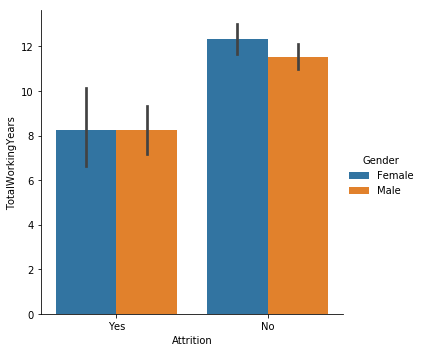

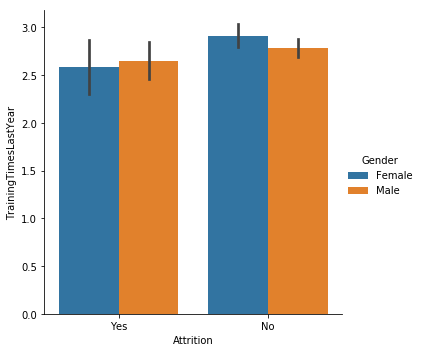

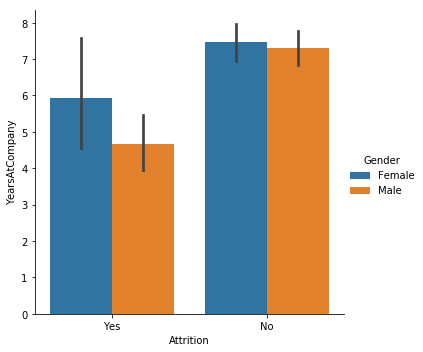

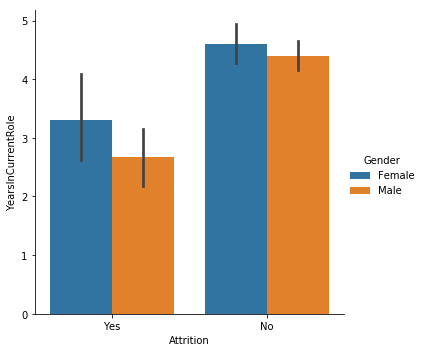

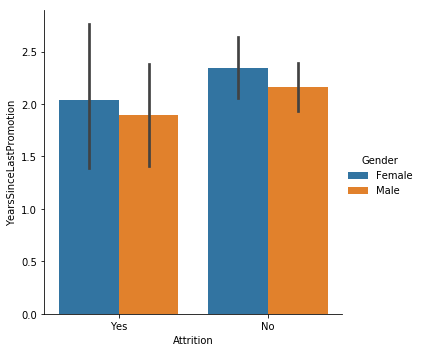

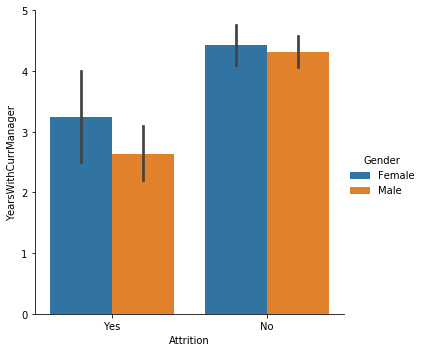

In [27]:
for i in feature_yr:
    sns.catplot(x='Attrition',y=i,hue='Gender',kind='bar',data=df)
    plt.show()

##analysis on the basis of gender

For the Total working years,Training times last year
: More females are given no attrition

Basis on years at company less men are given attrition

Years with current role female employees are more to get attrition



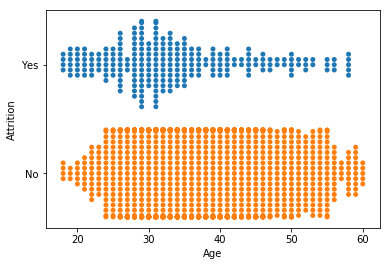

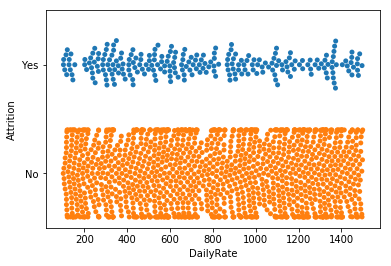

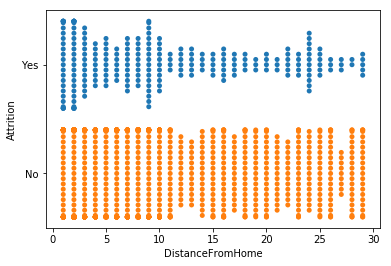

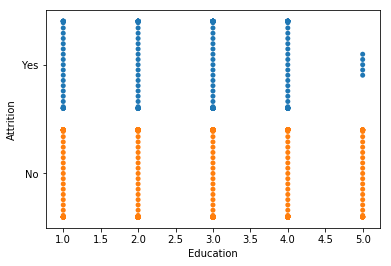

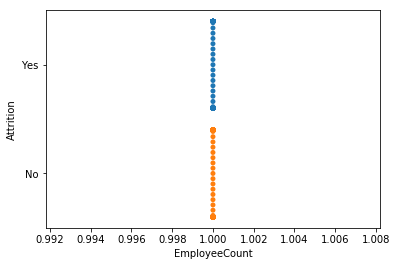

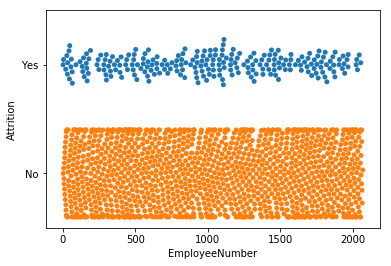

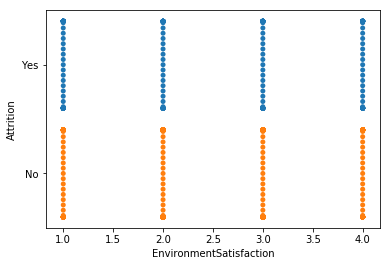

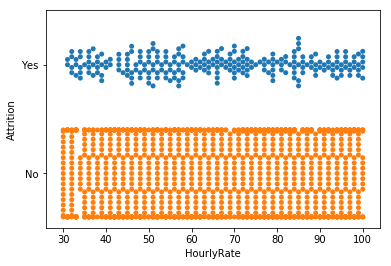

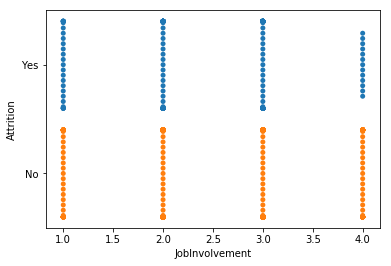

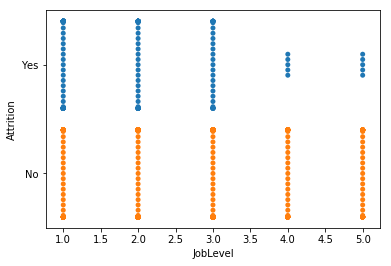

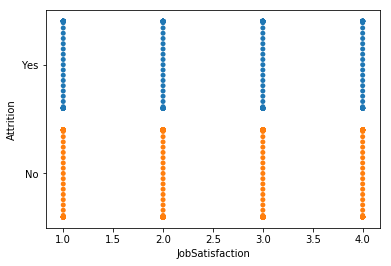

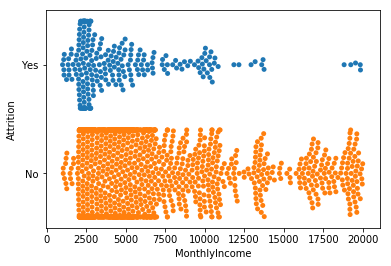

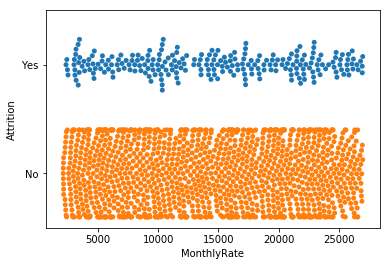

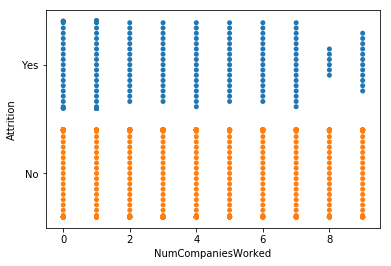

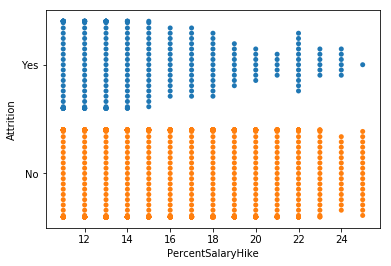

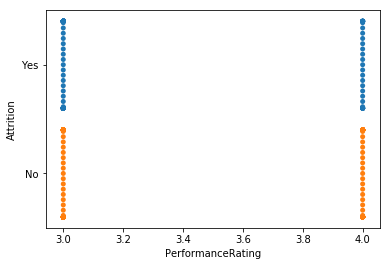

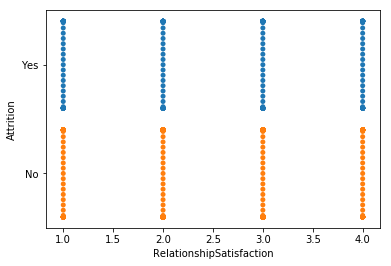

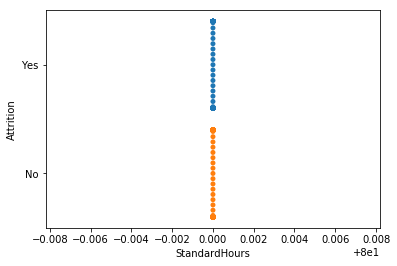

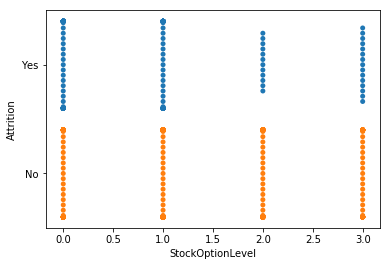

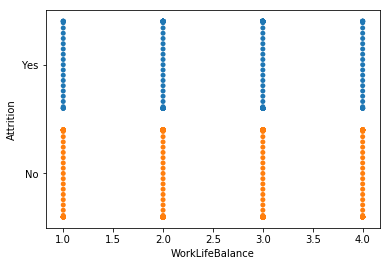

In [32]:
for i in numerical_features:
    if('Yr' in i or 'Year' in i):
        pass
    else:
        sns.swarmplot(x=i,y='Attrition',data=df)
        plt.show()

Employees with Education=5 got least attrition

Employees with low monthly income are more yes to attrition

Attrtion has no relation iwth Employeecount

In [35]:
for i in categorical_features:
    print(df[i].value_counts())
    print('------------------------------------------')

No     1233
Yes     237
Name: Attrition, dtype: int64
------------------------------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------------------------------------
Male      882
Female    588
Name: Gender, dtype: int64
------------------------------------------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80

Above are the different categories in the categorical features

Job roles has max discreate values(categories)

Over18 has only 1 category = Y

In [36]:
df.drop('Over18',axis=1,inplace=True)

Dropped Over18 as it has only oe category will not make any impact on target

In [37]:
cross_t = pd.crosstab(df['JobRole'],df['Attrition'])
print(cross_t)

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33


Cross table shows number of yes, no attrition on the basis of job roles

of the employees

In [38]:
observed_val = cross_t.values

In [168]:
import scipy.stats as stats
value = stats.chi2_contingency(cross_t)
print(value)

(86.19025367670434, 2.752481638050657e-15, 8, array([[109.87959184,  21.12040816],
       [ 43.61632653,   8.38367347],
       [217.24285714,  41.75714286],
       [ 85.55510204,  16.44489796],
       [121.62244898,  23.37755102],
       [ 67.10204082,  12.89795918],
       [244.92244898,  47.07755102],
       [273.44081633,  52.55918367],
       [ 69.61836735,  13.38163265]]))


In [169]:
expected_val = value[3]

In [170]:
chi,p,ddof,exp =  stats.chi2_contingency(observed=observed_val)

In [172]:
print('chi statistic',chi)
print('p value',p)
print('degree of freedom',ddof)


chi statistic 86.19025367670434
p value 2.752481638050657e-15
degree of freedom 8


In [171]:
if(p<=0.5):
    print('null hypothesis is rejected: There is a relation between two features')
else:
    print('null hypothesis is accepted: There is no relation between two features')

null hypothesis is rejected: There is a relation between two features


#Null Hypothesis is rejected : that means the two columns are dependent  

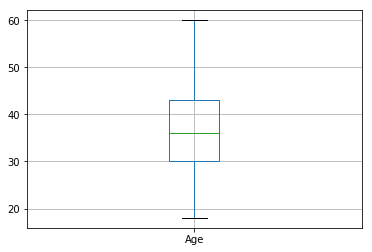

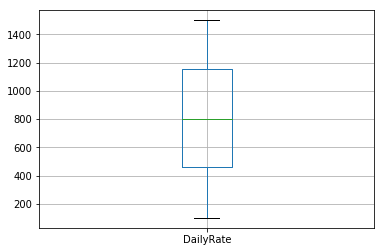

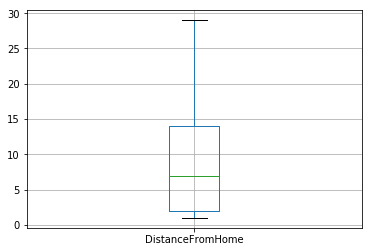

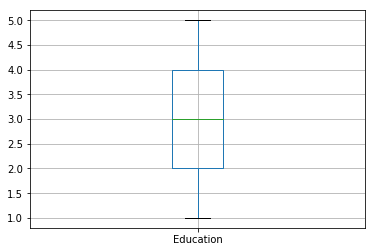

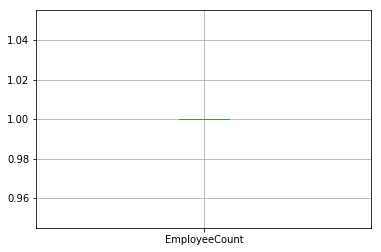

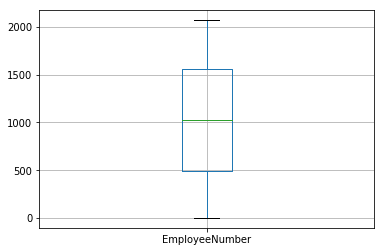

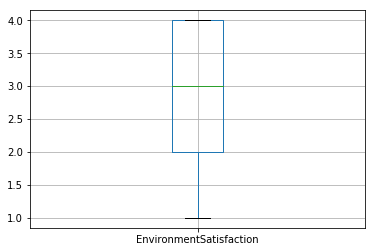

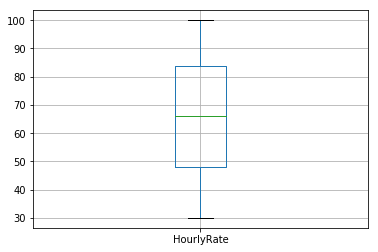

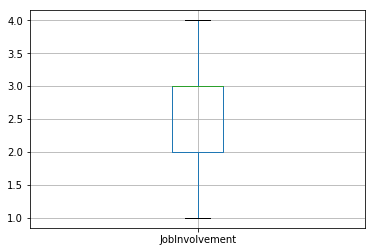

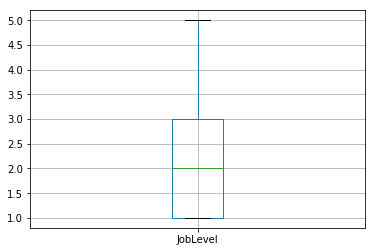

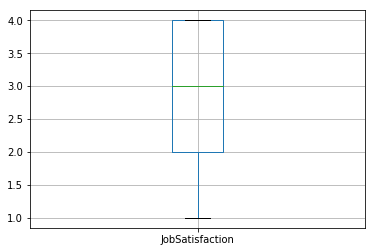

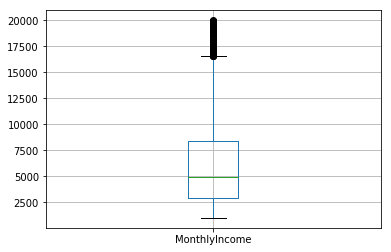

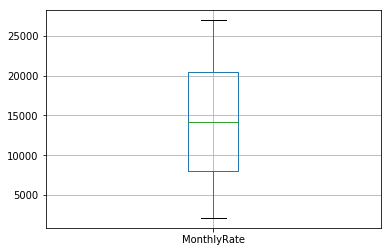

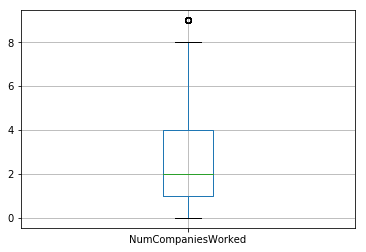

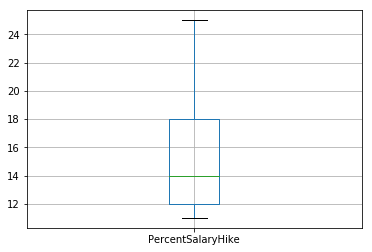

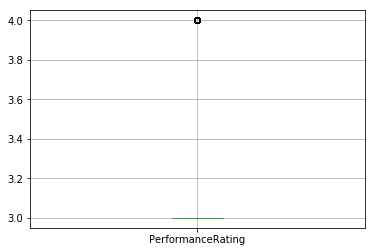

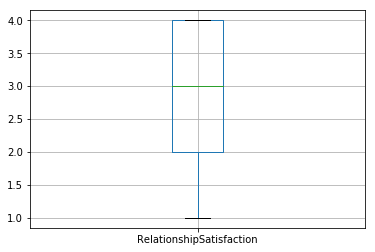

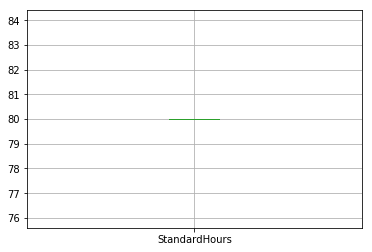

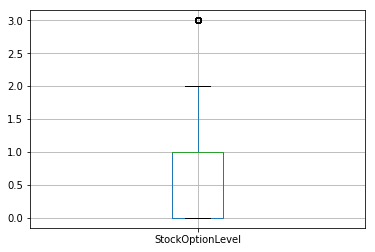

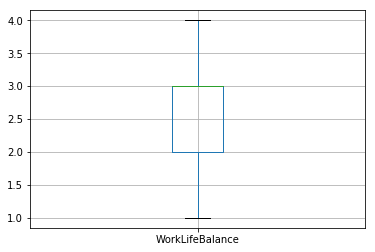

In [52]:
for i in numerical_features:
    if('Yr' in i or 'Year' in i):
        pass
    else:
        df.boxplot(i)
        plt.show()

Monthly income has outliers

In [54]:
df['MonthlyIncome'].max()

19999

In [56]:
df['MonthlyIncome'].min()

1009

In [57]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

Above 75 percentile outliers are present

It will be removed by cube root or square root transformation (because replacing it with mean or median
                                                              may loss the data)

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
label_encoder = LabelEncoder()

In [60]:
df['Attrition']= label_encoder.fit_transform(df['Attrition'])

In [61]:
df['BusinessTravel']= label_encoder.fit_transform(df['BusinessTravel'])

In [62]:
df['Department']= label_encoder.fit_transform(df['Department'])

In [63]:
df['EducationField']= label_encoder.fit_transform(df['EducationField'])

In [64]:
df['Gender'] =  label_encoder.fit_transform(df['Gender'])

In [65]:
df['JobRole'] =  label_encoder.fit_transform(df['JobRole'])

In [67]:
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])

In [69]:
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

In [70]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [71]:
df['StandardHours'].describe()

count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

In [72]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [73]:
df.drop('StandardHours',axis=1,inplace=True)

Standard Hours has only one value : 80 
    
Hence dropped it.

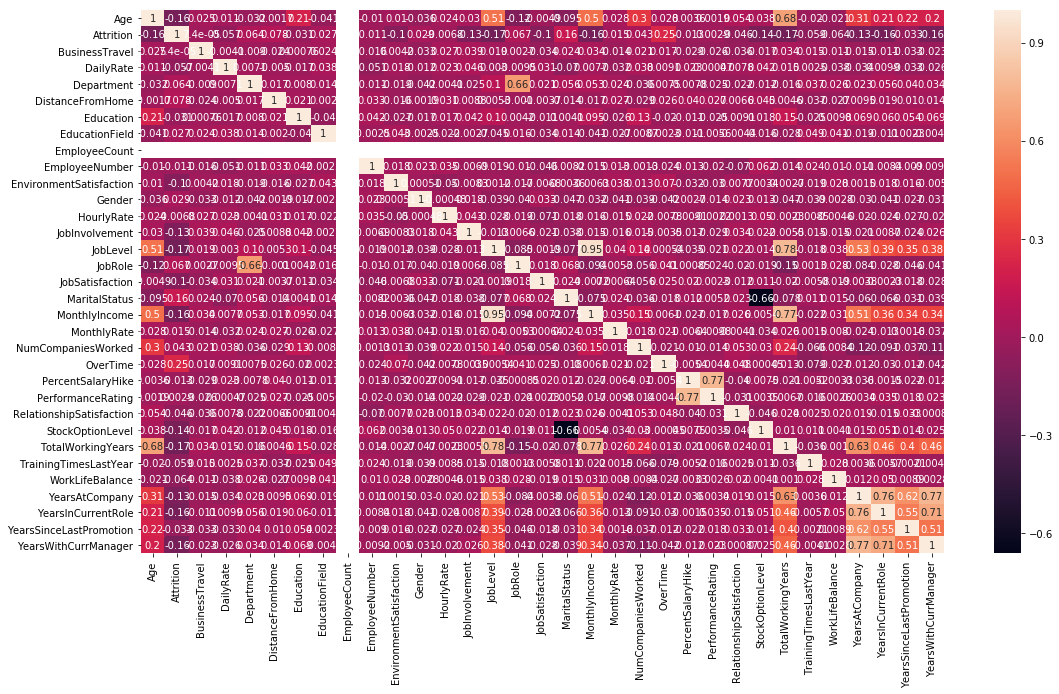

In [75]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

Employee count has no relation with any other column

Attrition has max relation with education field

And least relation with employee number

In [76]:
df.drop('EmployeeCount',axis=1,inplace=True)

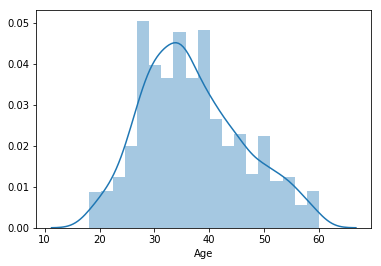

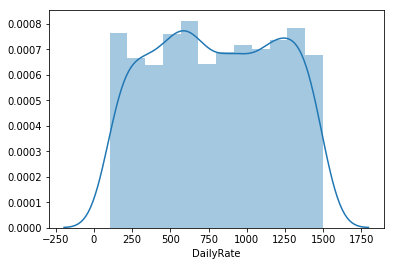

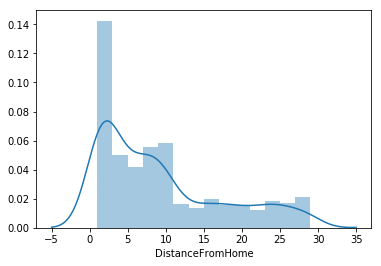

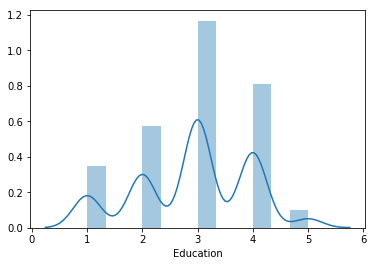

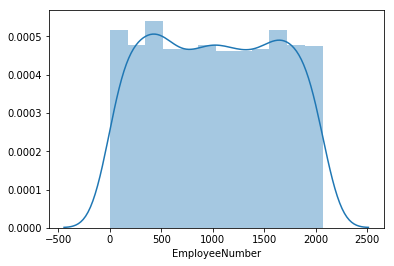

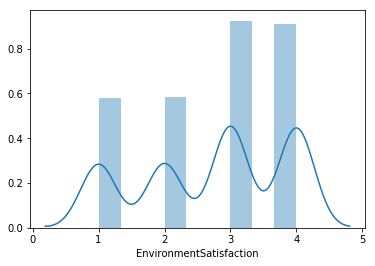

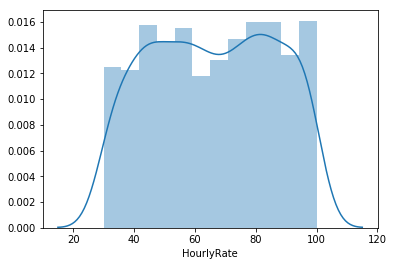

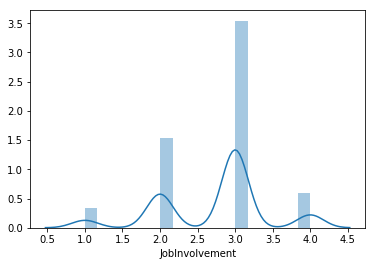

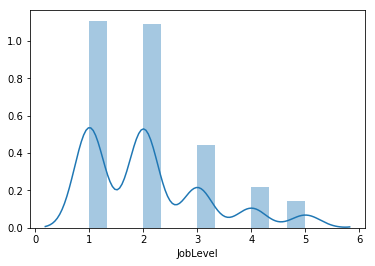

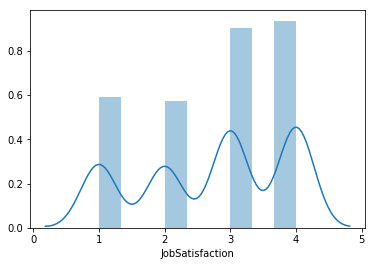

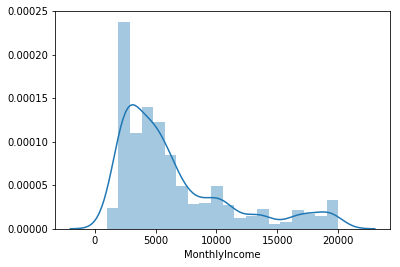

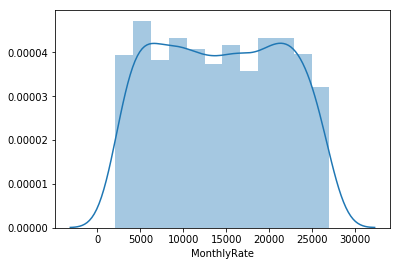

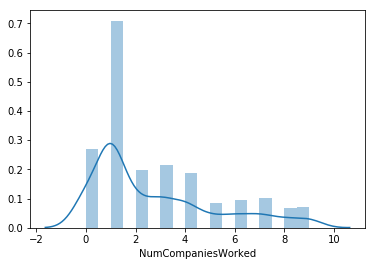

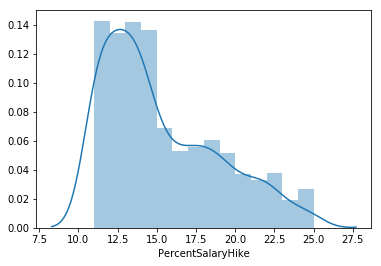

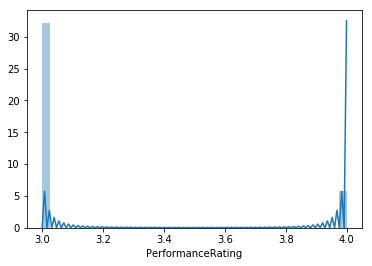

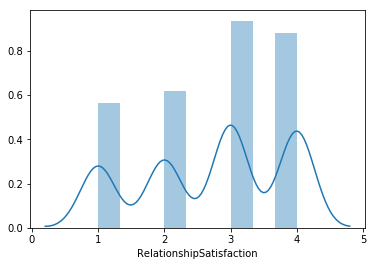

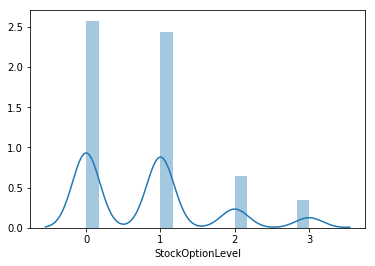

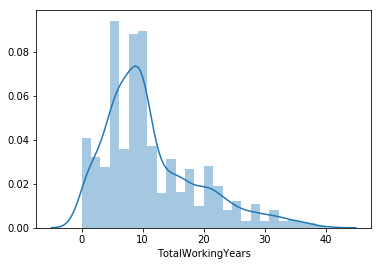

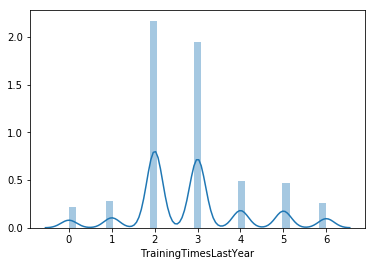

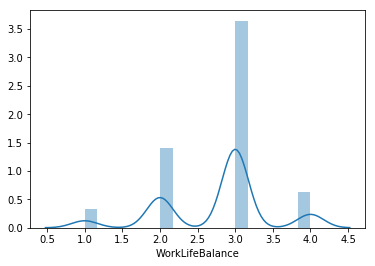

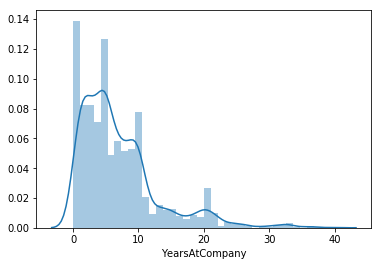

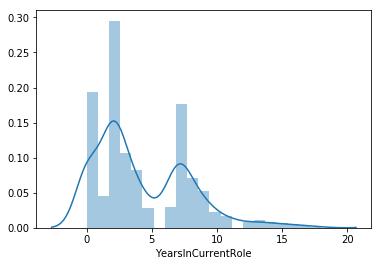

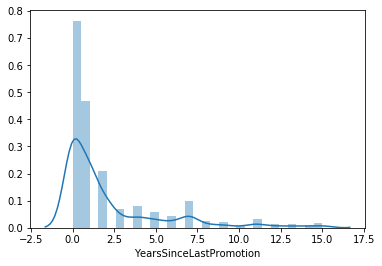

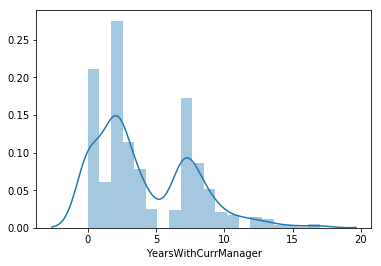

In [80]:
for i in numerical_features:
    if(i is 'yr' or i is 'year' or i=='EmployeeCount' or i =='StandardHours'):
        pass
    else:
        sns.distplot(df[i])
        plt.show()

Monthly income and percentage salary hike are skewed columns

Others distribution are also not ideal distribution because of the dicreate values

In [81]:
df['MonthlyIncome'].skew()

1.3698166808390662

In [82]:
df['MonthlyIncome'] = np.cbrt(df['MonthlyIncome'])

In [87]:
df['MonthlyIncome'].skew()

0.48512197596361095

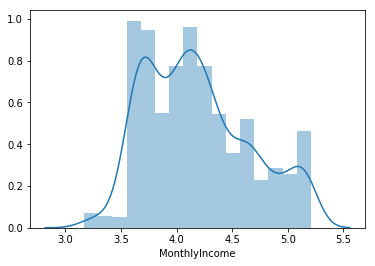

In [88]:
sns.distplot(df['MonthlyIncome'])

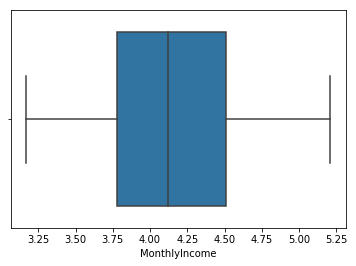

In [89]:
sns.boxplot(df['MonthlyIncome'])

Treating skewness also removed all the outliers from monthly income feature

In [91]:
df['PercentSalaryHike'].skew()

0.8211279755780908

In [92]:
df['PercentSalaryHike'] = np.cbrt(df['PercentSalaryHike'])

In [99]:
for i in numerical_features:
    if('Yr' in i or 'Year' in i or i =='EmployeeCount' or i=='StandardHours'):
        pass
    else:
        print(df[i].head())
        print('........................................................')

0    41
1    49
2    37
3    33
4    27
Name: Age, dtype: int64
........................................................
0    1102
1     279
2    1373
3    1392
4     591
Name: DailyRate, dtype: int64
........................................................
0    1
1    8
2    2
3    3
4    2
Name: DistanceFromHome, dtype: int64
........................................................
0    2
1    1
2    2
3    4
4    1
Name: Education, dtype: int64
........................................................
0    1
1    2
2    4
3    5
4    7
Name: EmployeeNumber, dtype: int64
........................................................
0    2
1    3
2    4
3    4
4    1
Name: EnvironmentSatisfaction, dtype: int64
........................................................
0    94
1    61
2    92
3    56
4    40
Name: HourlyRate, dtype: int64
........................................................
0    3
1    2
2    2
3    3
4    3
Name: JobInvolvement, dtype: int64
..............................

Each column has different range of values or dicreate values 

So needs to be scaled

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

In [102]:
df_n = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [103]:
df_n.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-1.701283,-0.660531,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.438422,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,-1.699621,0.254625,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,2.280906,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,-1.696298,1.169781,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935


In [104]:
from sklearn.model_selection import train_test_split

In [108]:
x = df_n.drop('Attrition',axis=1)
y = df['Attrition']

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33)

In [114]:
lr =  LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [115]:
accuracy_score(pred,y_test) 

0.8641975308641975

#Basic model is giving the accuracy of 86 %

In [116]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    if(round(accuracy_score(pred_test,y_test)*100,1)==round(accuracy_score(pred_train,y_train)*100,1)):
        print('random state',i)
        print('test accuracy',accuracy_score(pred_test,y_test))
        print('train accuracy',accuracy_score(pred_train,y_train))

random state 41
test accuracy 0.8765432098765432
train accuracy 0.8770325203252033
random state 46
test accuracy 0.8786008230452675
train accuracy 0.8790650406504065
random state 66
test accuracy 0.8765432098765432
train accuracy 0.8770325203252033
random state 84
test accuracy 0.8744855967078189
train accuracy 0.8739837398373984
random state 89
test accuracy 0.8786008230452675
train accuracy 0.8790650406504065
random state 126
test accuracy 0.8786008230452675
train accuracy 0.8790650406504065
random state 169
test accuracy 0.8724279835390947
train accuracy 0.8719512195121951
random state 252
test accuracy 0.8765432098765432
train accuracy 0.8770325203252033
random state 268
test accuracy 0.8806584362139918
train accuracy 0.8810975609756098
random state 281
test accuracy 0.8765432098765432
train accuracy 0.8770325203252033
random state 464
test accuracy 0.8744855967078189
train accuracy 0.8739837398373984
random state 515
test accuracy 0.8806584362139918
train accuracy 0.88109756097560

random_state = 268 is giving best accuracy score

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=268)

In [118]:
from sklearn.feature_selection import RFE

In [119]:
rfe_obj = RFE(estimator=lr,step=1)
rfe_obj = rfe_obj.fit(x_train,y_train)
features = pd.DataFrame({'features_selected':list(x_train.columns),'ranking_offeatures':rfe_obj.ranking_})

In [120]:
features.sort_values(by='ranking_offeatures',ascending=True)

,features_selected,ranking_offeatures
0,Age,1
28,YearsInCurrentRole,1
27,YearsAtCompany,1
24,TotalWorkingYears,1
23,StockOptionLevel,1
19,OverTime,1
18,NumCompaniesWorked,1
16,MonthlyIncome,1
29,YearsSinceLastPromotion,1
14,JobSatisfaction,1


In [121]:
x_train_rfe = rfe_obj.transform(x_train)
x_test_rfe = rfe_obj.transform(x_test)
rfe_model = lr.fit(x_train_rfe,y_train)
p = rfe_model.predict(x_test_rfe)
accuracy_score(p,y_test)

0.8827160493827161

RFE increase the accuracy score from 86 to 88 %

In [123]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [124]:
list_ofalgo = [DecisionTreeClassifier, KNeighborsClassifier,SVC,LogisticRegression]

In [128]:
for i in list_ofalgo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i,'accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('classification_report',classification_report(y_test,pred))
    print('-------------------------------------------------------------')

<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy_score 0.8004115226337448
confusion_matrix [[363  51]
 [ 46  26]]
classification_report               precision    recall  f1-score   support

           0       0.89      0.88      0.88       414
           1       0.34      0.36      0.35        72

    accuracy                           0.80       486
   macro avg       0.61      0.62      0.62       486
weighted avg       0.81      0.80      0.80       486

-------------------------------------------------------------
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> accuracy_score 0.845679012345679
confusion_matrix [[406   8]
 [ 67   5]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.98      0.92       414
           1       0.38      0.07      0.12        72

    accuracy                           0.85       486
   macro avg       0.62      0.53      0.52       486
weighted avg       0.79     

Here logistic Regression is giving best result of 88% accuracy score

In [129]:
from sklearn.model_selection import cross_val_score

In [131]:
lr = LogisticRegression()

In [132]:
for i in range(2,21):
    lr.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print('accuracy_score',accuracy_score(y_test,pred))
    cross_score = cross_val_score(lr,x,y,cv=i)
    print('cv. ',i)
    print(cross_score.mean())
    print('-------')

accuracy_score 0.8806584362139918
cv.  2
0.8612244897959184
-------
accuracy_score 0.8806584362139918
cv.  3
0.8707482993197279
-------
accuracy_score 0.8806584362139918
cv.  4
0.868017711171662
-------
accuracy_score 0.8806584362139918
cv.  5
0.8727891156462585
-------
accuracy_score 0.8806584362139918
cv.  6
0.8727891156462585
-------
accuracy_score 0.8806584362139918
cv.  7
0.874829931972789
-------
accuracy_score 0.8806584362139918
cv.  8
0.8727911914944168
-------
accuracy_score 0.8806584362139918
cv.  9
0.8700517066520359
-------
accuracy_score 0.8806584362139918
cv.  10
0.8734693877551019
-------
accuracy_score 0.8806584362139918
cv.  11
0.870063557809041
-------
accuracy_score 0.8806584362139918
cv.  12
0.8707294859833844
-------
accuracy_score 0.8806584362139918
cv.  13
0.8700452629190403
-------
accuracy_score 0.8806584362139918
cv.  14
0.872108843537415
-------
accuracy_score 0.8806584362139918
cv.  15
0.8727891156462586
-------
accuracy_score 0.8806584362139918
cv.  16
0.87

Number of folds is not making much impact on the result therefore taking cv = 7

In [133]:
for i in list_ofalgo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    cross_score = cross_val_score(obj,x,y,cv=7)
    print('cross score',cross_score.mean())
    print(i,'accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('classification_report',classification_report(y_test,pred))
    print('-------------------------------------------------------------')

cross score 0.7591836734693878
<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy_score 0.8024691358024691
confusion_matrix [[362  52]
 [ 44  28]]
classification_report               precision    recall  f1-score   support

           0       0.89      0.87      0.88       414
           1       0.35      0.39      0.37        72

    accuracy                           0.80       486
   macro avg       0.62      0.63      0.63       486
weighted avg       0.81      0.80      0.81       486

-------------------------------------------------------------
cross score 0.8394557823129251
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> accuracy_score 0.845679012345679
confusion_matrix [[406   8]
 [ 67   5]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.98      0.92       414
           1       0.38      0.07      0.12        72

    accuracy                           0.85       486
   macro avg       0

SVC is giving least difference between cross-val score and accuracy score

With accuracy of : 87%
 and cross_val score of 86

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [136]:
rf_obj = RandomForestClassifier(n_estimators=100,random_state=42)

In [137]:
rf_obj.fit(x_train,y_train)
predict = rf_obj.predict(x_test)
accuracy_score(predict,y_test)

0.8662551440329218

In [138]:
from sklearn.ensemble import AdaBoostClassifier

In [139]:
svc=SVC()
abclassifier = AdaBoostClassifier(n_estimators=100,base_estimator=svc,algorithm='SAMME')

In [140]:
abclassifier.fit(x_train,y_train)
predict = abclassifier.predict(x_test)
accuracy_score(predict,y_test)

0.8518518518518519

Ensemble techniques are not making much impact 

So going with hyper parametric tuning of SVC

In [147]:
parameters = {'kernel':['linear','rbf','poly'],'C':[1,10,100,1000]} 

In [163]:
gridcv = GridSearchCV(svc,parameters, refit = True, scoring='accuracy')

In [165]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [150]:
best_para = gridcv.best_params_
print(best_para)
best_res = gridcv.best_score_
print(best_res)

{'C': 1, 'kernel': 'linear'}
0.8668911219310059


Best paramters are: linear kernel and c=1
    
With best accuracy of 86%

In [151]:
pred_grid = gridcv.predict(x_test)


In [153]:
print(accuracy_score(pred_grid,y_test))
print(confusion_matrix(pred_grid,y_test))
print(classification_report(pred_grid,y_test))


0.8950617283950617
[[408  45]
 [  6  27]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       453
           1       0.38      0.82      0.51        33

    accuracy                           0.90       486
   macro avg       0.68      0.86      0.73       486
weighted avg       0.94      0.90      0.91       486



# Grid search is giving accuracy of 89.5%

Saving the model

In [154]:
import pickle

In [155]:
Hr_analytics = 'hr.pkl'
pickle.dump(gridcv,open(Hr_analytics,'wb'))

conclusion

In [166]:
original_result = np.array(y_test)
pred_result = np.array(gridcv.predict(x_test))
df_comparison = pd.DataFrame({'original':pred_result,'predicted':pred_result})
df_comparison

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
481,0,0
482,0,0
483,0,0
484,0,0
